# Exploratory Data Analysis + model evaluation
In this notebook I'll work with Loan Approval Classification Dataset: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

It contains various data about people and their status of the loan approval.

The dataset contains 45,000 records and 14 columns.

Steps for EDA:

* Data Cleaning.
* Data Visualization.
* Feature Engineering.
* Statistical Summary.

Steps for model evaluation:

* Find the dependent variable of the dataset (loan_status).
* Split the data into predictors (X) and target variable (y).
* Split the X and y datasets into training and testing sets.
* Train various machine learning models to evaluate their performance.
* Determine the best model for the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ML models for classification problems
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold,  GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder


import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv(os.path.join(dirname, filename))

/kaggle/input/loan-approval-classification-data/loan_data.csv


In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# Exploratory Data Analysis

In [4]:
df.shape

(45000, 14)

As I've already mentioned, the dataset contains 45000 rows and 14 columns.

In [5]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

The dataset doesn't contain any null values.

In [6]:
df.duplicated().sum()

0

The dataset doesn't contain any duplicates.

In [7]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

Types for each column look reasonable.

In [8]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [10]:
df.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

The dataset by default looks really good. Data types make sense for every column, it doesn't contain any nulls or duplicates too.

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_exp'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>],
       [<Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

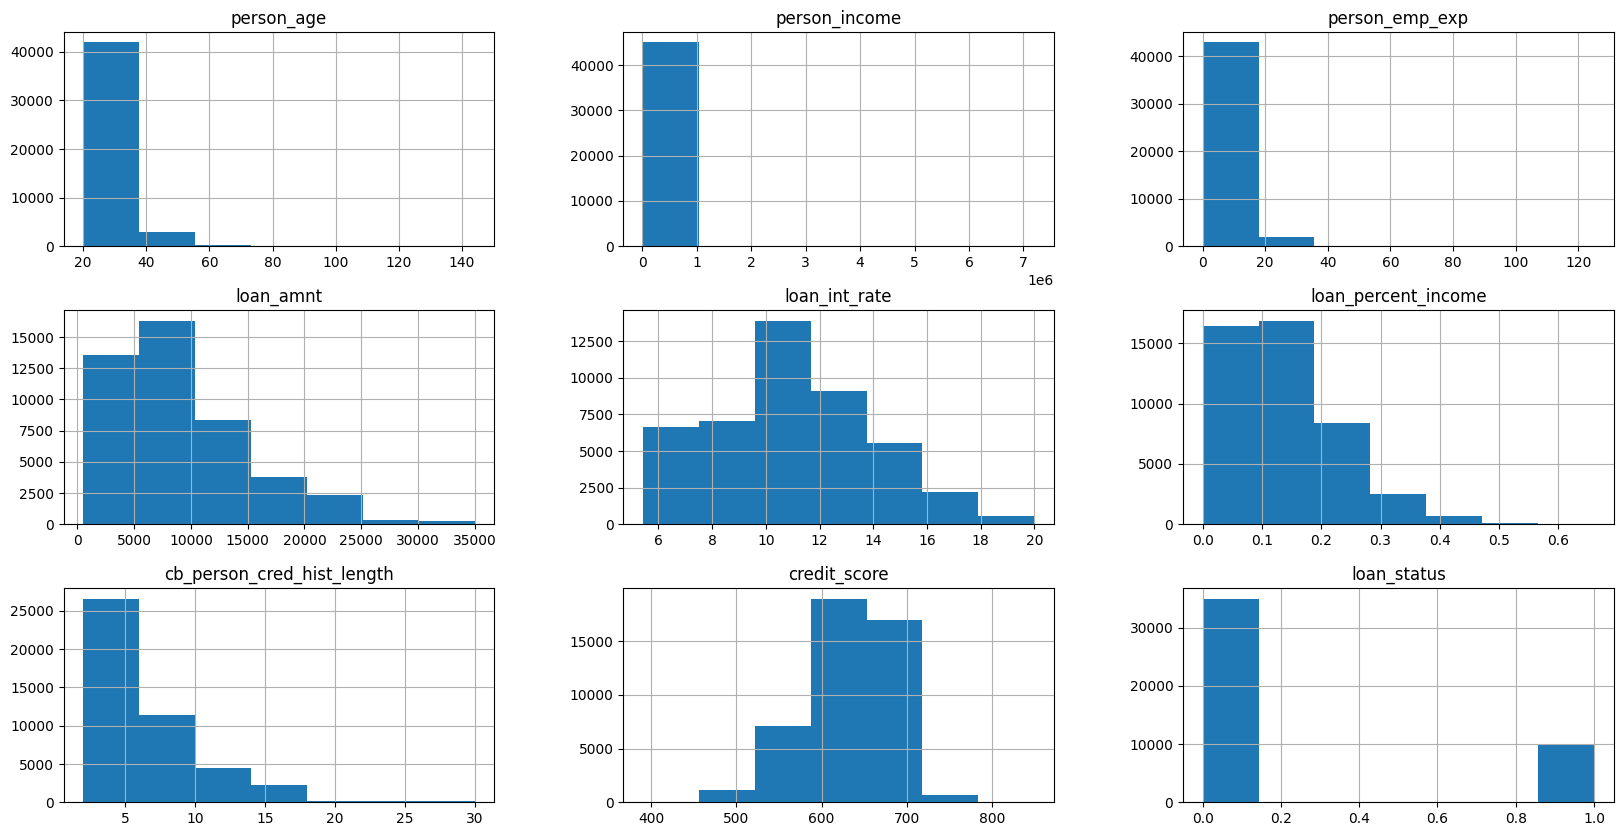

In [11]:
df.hist(figsize=(20,10),bins=7)

In [12]:
print(f"Loan approved: {len(df[df['loan_status'] == 1]) / len(df):.2%}")
print(f"Loan disapproved: {len(df[df['loan_status'] == 0]) / len(df):.2%}")

Loan approved: 22.22%
Loan disapproved: 77.78%


The majority of people are between the ages of 20 and 40. Most loan statuses are negative.

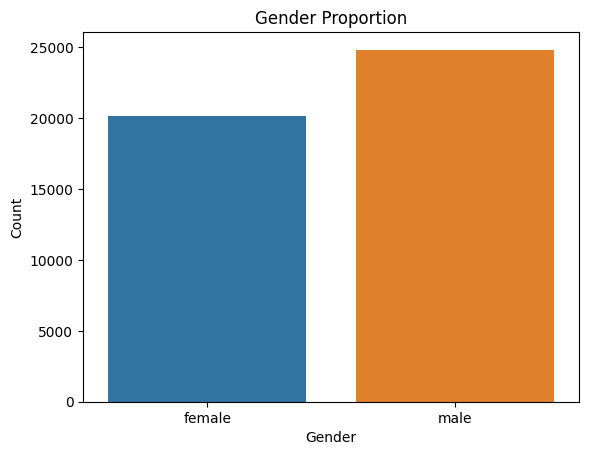

In [13]:
sns.countplot(x='person_gender', data=df)
plt.title('Gender Proportion')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The majority of people in data are males.

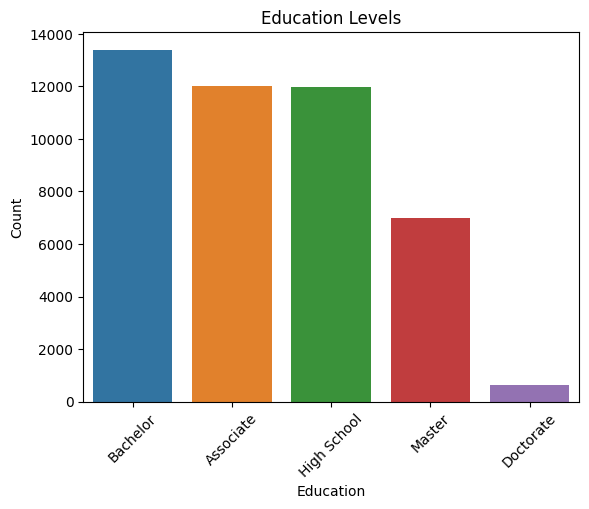

In [14]:
sns.countplot(x='person_education', data=df, order=df['person_education'].value_counts().index)
plt.title('Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The majority of people in the dataset have a Bachelor's, Associate's, or High School education, which makes sense as these levels are more common than Master's or Doctorate degrees.

In [15]:
df.groupby('person_education')['loan_status'].mean()

person_education
Associate      0.220319
Bachelor       0.225241
Doctorate      0.228663
High School    0.223104
Master         0.217622
Name: loan_status, dtype: float64

Loan approval does not depend on a person's education level. The likelihood of approval is approximately 20% across all education levels in the dataset.

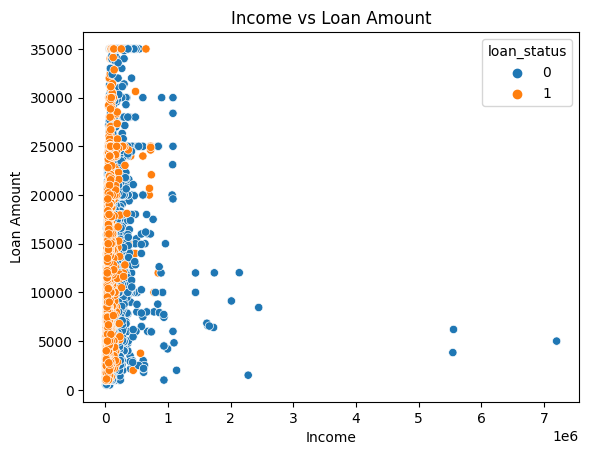

In [16]:
sns.scatterplot(x='person_income', y='loan_amnt', data=df, hue='loan_status')
plt.title('Income vs Loan Amount')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

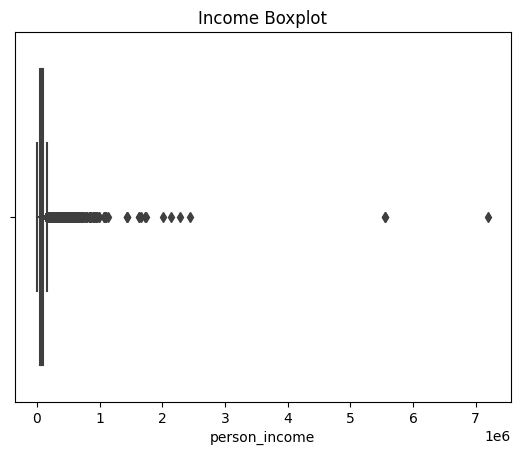

In [17]:
sns.boxplot(x=df['person_income'])
plt.title('Income Boxplot')
plt.show()

The person_income column has some extreme outliers, I'll get rid of them so that the boxplot is much clearer.

In [18]:
45000 - len(df[df['person_income'] < 1e6])

24

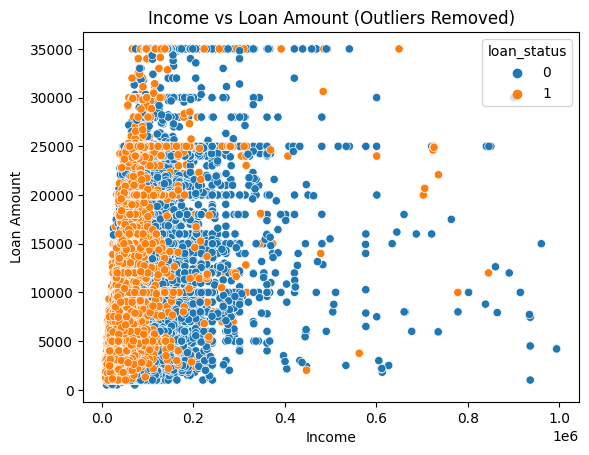

In [19]:
df = df[df['person_income'] < 1e6]

# Re-plot the scatterplot
sns.scatterplot(x='person_income', y='loan_amnt', data=df, hue='loan_status')
plt.title('Income vs Loan Amount (Outliers Removed)')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

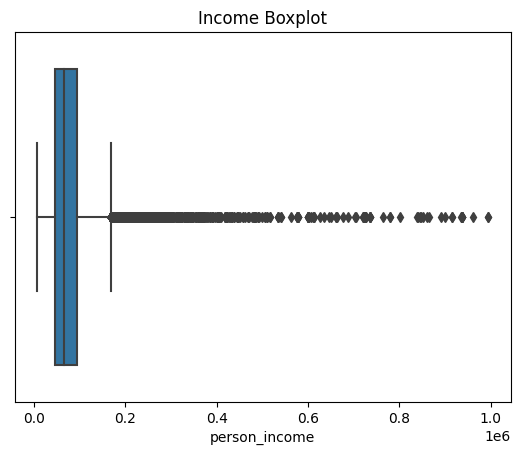

In [20]:
sns.boxplot(x=df['person_income'])
plt.title('Income Boxplot')
plt.show()

Although the boxplot still contains some outliers, it looks much clearer. Next thing I want to focus on are ages.

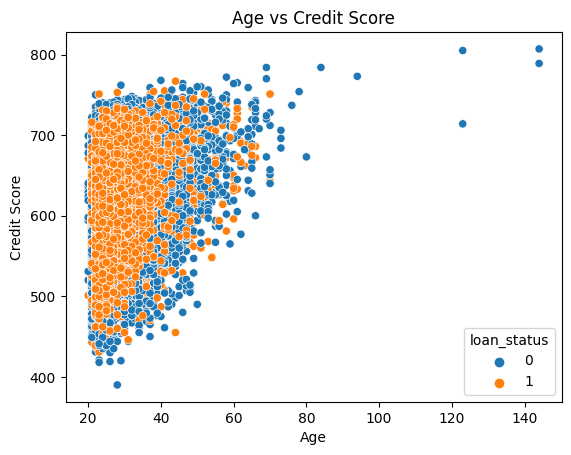

In [21]:
sns.scatterplot(x='person_age', y='credit_score', data=df, hue='loan_status')
plt.title('Age vs Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

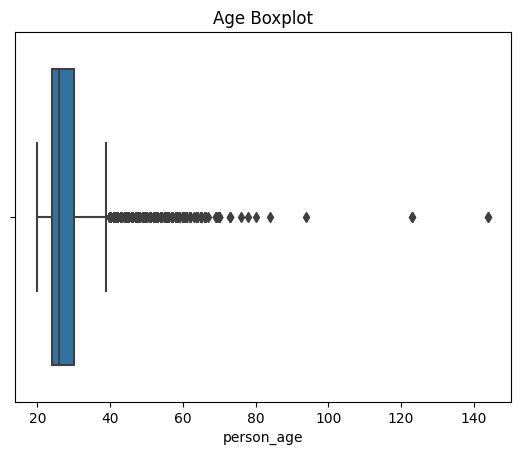

In [22]:
sns.boxplot(x=df['person_age'])
plt.title('Age Boxplot')
plt.show()

There are some outliers that say some people in the dataset are older than 120 years old. The oldest person ever whose age has been independently verified was 122 years old. Which means this data is surely incorrect. I'll get rid of these outliers.

In [23]:
df = df[df['person_age'] < 120]

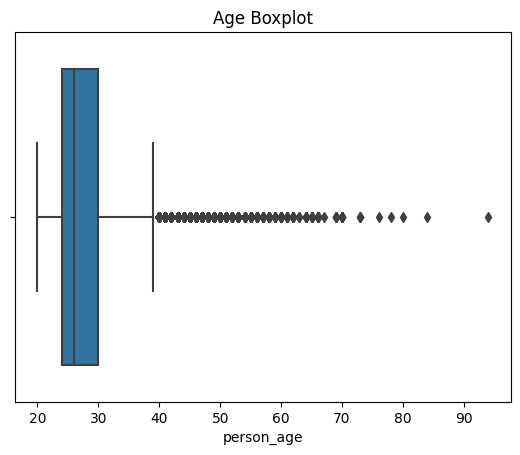

In [24]:
sns.boxplot(x=df['person_age'])
plt.title('Age Boxplot')
plt.show()

In [25]:
df['person_age'].max()

94.0

Now the boxplot looks correctly, and the maximum age in the dataset is 94 years old.

# Feature engineering

The dataset looks really good, the only thing I'll do here will be encoding categorical variables and scaling numerical variables.

In [26]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [27]:
df.nunique()

person_age                           56
person_gender                         2
person_education                      5
person_income                     33962
person_emp_exp                       56
person_home_ownership                 4
loan_amnt                          4477
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        335
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [28]:
categorical_columns = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file',
]

numerical_columns = [
    'person_age',
    'person_income',
    'person_emp_exp',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'credit_score'
]

In [29]:
label_encoder = LabelEncoder()

for column in df[categorical_columns]:  
    df[column] = label_encoder.fit_transform(df[column])

In [30]:
df[numerical_columns] = df[numerical_columns].astype('float64')
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [31]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,-0.973366,0,4,-0.133496,-0.910777,3,4.026084,4,1.682770,4.016989,-0.739456,-1.420238,0,1
1,-1.142917,0,3,-1.224615,-0.910777,2,-1.359316,1,0.044763,-0.685902,-0.997838,-2.551104,1,0
2,-0.464712,0,3,-1.221762,-0.403554,0,-0.646543,3,0.625450,3.443466,-0.739456,0.047904,0,1
3,-0.803815,0,1,0.009235,-0.910777,3,4.026084,3,1.417601,3.443466,-0.997838,0.841494,0,1
4,-0.634264,1,4,-0.239799,-0.741702,3,4.026084,3,1.095370,4.475808,-0.481074,-0.924244,0,1


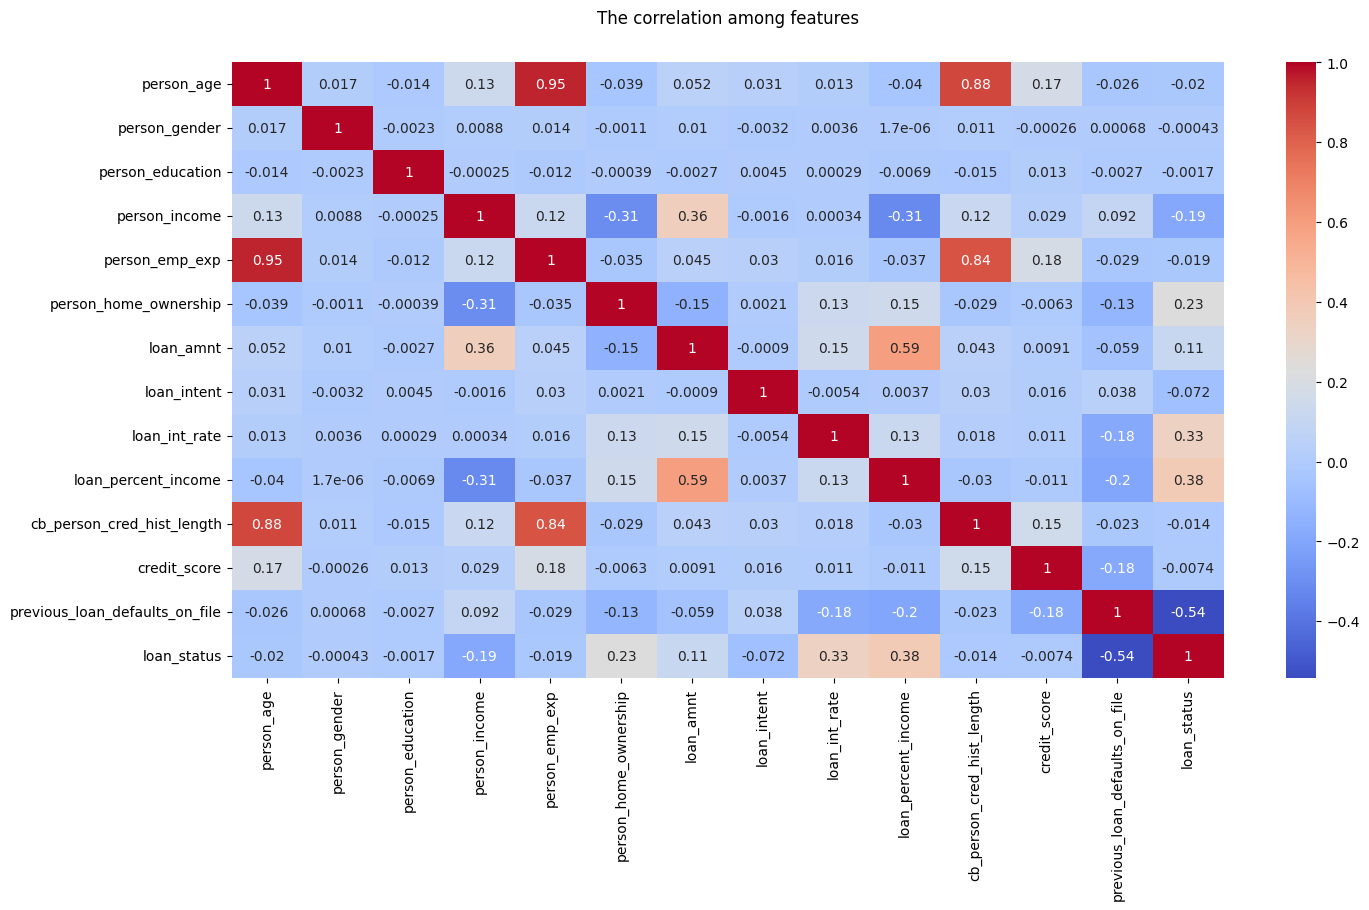

In [32]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features',y= 1.05)
plt.show()

Five features that are the most correlated to the dependent variable loan_status (bottom row) are:
* previous_loan_defaults_on_file with corr. score -0.54
* loan_percent_income with corr. score 0.38
* loan_int_rate with corr. score 0.33
* person_home_ownership with corr. score 0.23
* person_income with corr. score -0.19

Because every feature makes sense to be a predictor for loan_status, I won't drop anything and start model evaluation step.

# Model evaluation
In this step I'll first split the data into X and y, then into train and test subsets and after that I'll loop over various machine learning models to see which has the best score.

In [33]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)

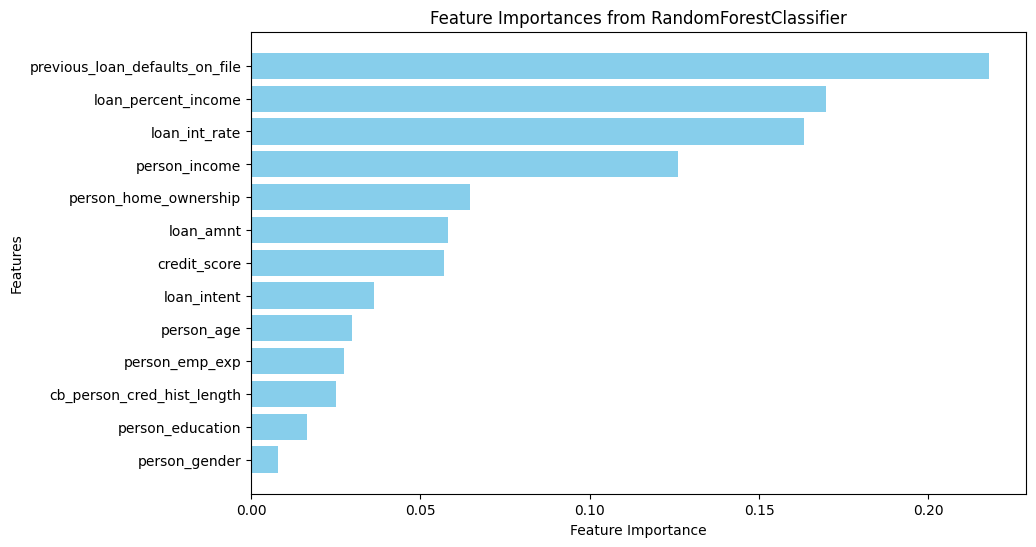

In [34]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from RandomForestClassifier')
plt.gca().invert_yaxis() 
plt.show()

According to the plot above, there are four features that have significantly higher importance score than other features, these are:
* previous_loan_defaults_on_file
* loan_percent_income
* loan_int_rate
* person_income

In [35]:
ml_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier()
}

model_names = []
model_scores = []

for name, clf in ml_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    model_scores.append(score)

model_perf_df = pd.DataFrame({
    'Model_names': model_names,
    'Model_scores': model_scores
}).sort_values(by='Model_scores', ascending=False)

model_perf_df

,Model_names,Model_scores
7,XGBoost,0.934742
4,Random Forest,0.927515
5,Gradient Boosting,0.922290
2,Support Vector Machine,0.906615
3,Decision Tree,0.896276
0,Logistic Regression,0.893385
1,K-Nearest Neighbors,0.889939
6,Gaussian Naive Bayes,0.728738


It looks like XGBoost model has the best accuracy score out of all models I looped through. And the score is really high, over 93%!

Accuracy Score: 0.9347

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6995
           1       0.89      0.81      0.85      2000

    accuracy                           0.93      8995
   macro avg       0.92      0.89      0.90      8995
weighted avg       0.93      0.93      0.93      8995



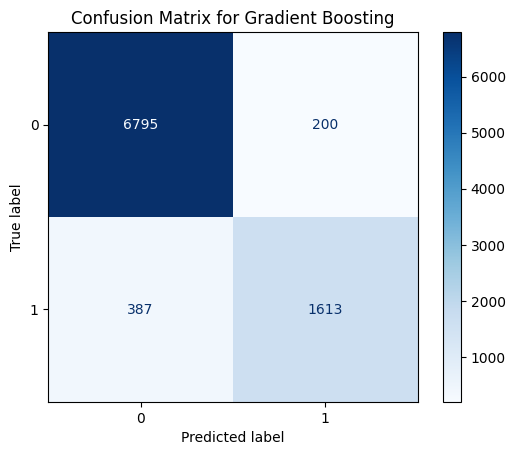

In [36]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Gradient Boosting')
plt.show()

# Hyperparameter tuning

In [37]:
xgb_clf = XGBClassifier(
    use_label_encoder=False,  
    eval_metric='logloss',    
    random_state=42           
)

param_grid = {
    'n_estimators': [50, 100],        
    'learning_rate': [0.01, 0.1],    
    'max_depth': [3, 5],               
    'subsample': [0.8, 1.0],              
    'colsample_bytree': [0.8, 1.0],       
    'gamma': [0, 1],                  
    'reg_alpha': [0, 0.1],            
    'reg_lambda': [1.0, 2.0]         
}

stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',    
    cv=stratified_kf,        
    verbose=1,               
    n_jobs=-1               
)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
print(classification_report(y, y_pred))

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8}
Best Score: 0.928133068268723
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     34972
           1       0.90      0.79      0.84     10000

    accuracy                           0.93     44972
   macro avg       0.92      0.88      0.90     44972
weighted avg       0.93      0.93      0.93     44972



Unfortunately accuracy score is slightly worse with GridSearchCV. With default parameters it was 93%, after hyperparameter tuning it's 92%.
Now, before model evaluation I plotted feature importance scores for each feature in the dataset and I pointed that there are four features with highest importance scores. Now, I'd like to check what accuracy score would model have if I used only these four features as predictors.

# Reducing dimensionality

Accuracy Score: 0.9151

Classification Report for model after reduced dimensionality:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6995
           1       0.83      0.78      0.80      2000

    accuracy                           0.92      8995
   macro avg       0.88      0.87      0.87      8995
weighted avg       0.91      0.92      0.91      8995



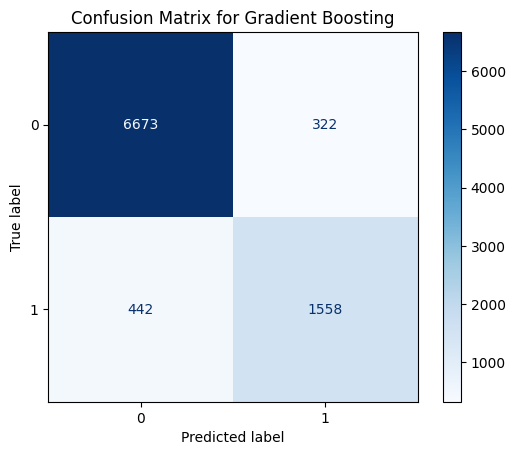

In [39]:
X_train = X_train[['previous_loan_defaults_on_file', 'loan_percent_income', 'loan_int_rate', 'person_income']]
X_test = X_test[['previous_loan_defaults_on_file', 'loan_percent_income', 'loan_int_rate', 'person_income']]

clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
print("\nClassification Report for model after reduced dimensionality:")
print(report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Gradient Boosting')
plt.show()

That's interesting, looks like the prediction with an accuracy score 92% is possible with just four features with highest importance score as predictors!

# Conclusion

The dataset was well-maintained, without any nulls or duplicates. The data appeared reasonable and realistic, except for the highest age value, which I managed to fix.

Before working with the machine learning models, I scaled all numerical features and encoded categorical ones to prevent errors during model evaluation.

The best-performing model, XGBoost, achieved an accuracy of over 93% using all features as predictors. A similar accuracy can be achieved using just the four most important features, which primarily indicate whether the person previously had a loan and their income. These features are:
* previous_loan_defaults_on_file
* loan_percent_income
* loan_int_rate
* person_income